# 버스 노선 확인 
(1) 이용 승객 내림차순 정리  
(2) 이용 가장 많은 143 버스 12월 날짜별 변동 그래프  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
# 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보 (12월)
# url : http://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do;jsessionid=31D5954E273D1A112655EE5150E04982.new_portal-svr-11
df_20 = pd.read_csv('./data/BUS_STATION_BOARDING_MONTH_202012.csv',low_memory = False,encoding = 'EUC-KR')


In [4]:
# column 확인
df_20.columns

Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object')

In [5]:
# row개수 1,189,541개 약 120만개 
df_20.shape

(1189541, 8)

In [6]:
#일자, 노선번호, 각 정류소명에 따라 정렬이 되어있음을 확인
df_20.head(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20201201,100,100번(하계동~용산구청),11428,한성여객종점,36,3,20201204
1,20201201,100,100번(하계동~용산구청),11387,노원평생학습관,4,3,20201204
2,20201201,100,100번(하계동~용산구청),11373,중계역,47,6,20201204
3,20201201,100,100번(하계동~용산구청),11381,중계목화아파트4단지,144,19,20201204
4,20201201,100,100번(하계동~용산구청),08007,돈암사거리.성신여대입구,64,276,20201204
5,20201201,100,100번(하계동~용산구청),08009,삼선교.한성대학교,89,206,20201204
6,20201201,100,100번(하계동~용산구청),01220,혜화역.마로니에공원,179,47,20201204
7,20201201,102,102번(상계동~동대문),10331,신창.창동시장,306,256,20201204
8,20201201,106,106번(의정부~동대문),01219,방송통신대.이화장,49,29,20201204
9,20201201,142,142번(도봉동~고속터미널),10006,서울북부지방법원.검찰청.도봉역성황당,42,166,20201204


In [7]:
# unique사용해서 중복 제거한 버스 확인
df_20['노선번호'].unique()

array(['100', '102', '106', '142', '162', '600', '2112', '463', '704',
       '750B', '1155', '143', '1156', 'N15', '601', '2227', '2211',
       '4419', '5413', '771', '2222', '740', '2312', '5530', '2233',
       '602', '5531', '5534', '5535', '5536', '362', '5623', '171',
       '2311', '5624', '654', '5625', '5626', '603', '342', '5627',
       '5630', '5714', '5713', '674', '2413', '173', '6513', '6616',
       '6635', '604', '6637', '3212', '6654', '6638', '8761', '8771',
       '8551', '673', '8331', '7734', '3217', '7016', '7017', '773',
       '7021', '3313', '7726', '172', '7727', '774', '605', '3314',
       '7728', '110A', '7025', '440', '3315', '441', '761', '541', '6615',
       '3411', '02', '542', '6516', '9711A', '9701', '606', '3412',
       '3321', '9703', '3012', '9408', '144', '9403', '121', '9707',
       '4211', '9401', '3413', '9404', '700', '242', '260', 'N26', '3322',
       '3414', '640', 'N37', '3426', '강동02', '4435', '507', '3416', 'N65',
       '702B', '56

In [8]:
# 중복 제거한 버스 list를 만들고 5개 먼저 뽑아보기.
bus_list = df_20['노선번호'].unique()
for i in bus_list[:5]:
    print(i)

100
102
106
142
162


In [9]:
lists = df_20['노선번호'].unique()
bus_num =[]        # 노선 번호
up_pass =[]        # 승차 승객 수 
do_pass =[]        # 하차 승객 수
agg_pass =[]       # 승,하차 승객 수 

# 버스노선 5개에 대하여 노선번호, 승/하차/총 승객 수 dataframe생성 
for i in lists[:5]:
    kk = df_20[df_20['노선번호']==i]
    bus_num.append(i)
    kk['총 승객수'] = kk['승차총승객수']+kk['하차총승객수']
    up_pass.append(format(kk['승차총승객수'].sum(), ","))        # 숫자 단위 보기 쉽게 format사용
    do_pass.append(format(kk['하차총승객수'].sum(), ","))
    agg_pass.append(format(kk['총 승객수'].sum(), ","))

da = {
   '노선번호': bus_num,
    '승차총승객수': up_pass,
   '하차총승객수': do_pass,
   '총 승객수': agg_pass}
bus= pd.DataFrame(data=da)
bus

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,노선번호,승차총승객수,하차총승객수,총 승객수
0,100,"338,762","329,687","668,449"
1,102,"279,875","273,807","553,682"
2,106,"238,449","234,231","472,680"
3,142,"503,582","488,220","991,802"
4,162,"336,237","325,823","662,060"


In [10]:
bus.sort_values(by ='총 승객수',ascending=False)

,노선번호,승차총승객수,하차총승객수,총 승객수
3,142,"503,582","488,220","991,802"
0,100,"338,762","329,687","668,449"
4,162,"336,237","325,823","662,060"
1,102,"279,875","273,807","553,682"
2,106,"238,449","234,231","472,680"


---
## 서울시 전체 버스에 대해서 정렬하기

In [11]:
# 서울시 버스 노선 개수
len(df_20['노선번호'].unique())

623

In [12]:
lists = df_20['노선번호'].unique()
bus_num =[]

up_pass =[]
do_pass =[]
agg_pass =[]
for i in lists:
    kk = df_20[df_20['노선번호']==i]
    bus_num.append(i)
    kk['총 승객수'] = kk['승차총승객수']+kk['하차총승객수']
    up_pass.append(format(kk['승차총승객수'].sum(), ","))
    do_pass.append(format(kk['하차총승객수'].sum(), ","))
    agg_pass.append(format(kk['총 승객수'].sum(), ","))

da = {
   '노선번호': bus_num,
    '승차총승객수': up_pass,
   '하차총승객수': do_pass,
   '총 승객수': agg_pass}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
bus= pd.DataFrame(data=da)
bus

,노선번호,승차총승객수,하차총승객수,총 승객수
0,100,"338,762","329,687","668,449"
1,102,"279,875","273,807","553,682"
2,106,"238,449","234,231","472,680"
3,142,"503,582","488,220","991,802"
4,162,"336,237","325,823","662,060"
...,...,...,...,...
618,2115,"272,977","268,129","541,106"
619,702A,"380,714","370,403","751,117"
620,8777,73,73,146
621,8002,45,44,89


In [14]:
bus.sort_values(by ='총 승객수',ascending=False)
# 콤마 사용시, 정렬 문제점 발생 

,노선번호,승차총승객수,하차총승객수,총 승객수
3,142,"503,582","488,220","991,802"
367,영등포02,"50,371","49,215","99,586"
120,641,"497,593","487,212","984,805"
579,성북21,"49,543","48,782","98,325"
449,1115,"49,372","48,710","98,082"
...,...,...,...,...
26,5531,"542,974","536,223","1,079,197"
342,340,"548,331","526,387","1,074,718"
182,720,"529,666","516,471","1,046,137"
580,4318,"528,703","513,031","1,041,734"


In [15]:
lists = df_20['노선번호'].unique()
bus_num =[]

up_pass =[]
do_pass =[]
agg_pass =[]
for i in lists:
#     print(i)
    kk = df_20[df_20['노선번호']==i]
    bus_num.append(i)
    kk['총 승객수'] = kk['승차총승객수']+kk['하차총승객수']
    up_pass.append(kk['승차총승객수'].sum())
    do_pass.append(kk['하차총승객수'].sum())
    agg_pass.append(kk['총 승객수'].sum())

da = {
   '노선번호': bus_num,
    '승차총승객수': up_pass,
   '하차총승객수': do_pass,
   '총 승객수': agg_pass}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [16]:
bus= pd.DataFrame(data=da)
bus

,노선번호,승차총승객수,하차총승객수,총 승객수
0,100,338762,329687,668449
1,102,279875,273807,553682
2,106,238449,234231,472680
3,142,503582,488220,991802
4,162,336237,325823,662060
...,...,...,...,...
618,2115,272977,268129,541106
619,702A,380714,370403,751117
620,8777,73,73,146
621,8002,45,44,89


In [17]:
# 서울시 버스 이용 승객 수를 내림차순으로 정렬한 표 
bus.sort_values(by ='총 승객수',ascending=False)

,노선번호,승차총승객수,하차총승객수,총 승객수
11,143,728922,703708,1432630
534,152,723820,708104,1431924
583,160,705697,686874,1392571
188,130,687739,673479,1361218
610,303,643834,632451,1276285
...,...,...,...,...
346,성북05,2151,2111,4262
530,8112,2121,2092,4213
283,03,1552,1490,3042
620,8777,73,73,146


In [18]:
bus_143 = df_20[df_20['노선번호']=='143']
bus_143

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
264,20201201,143,143번(정릉~개포동),~,대진여객차고지(가상),509,5,20201204
327,20201201,143,143번(정릉~개포동),08161,정릉산장아파트,681,7,20201204
391,20201201,143,143번(정릉~개포동),08163,정릉4동주민센터.경국사,148,99,20201204
454,20201201,143,143번(정릉~개포동),08408,북한산보국문역2번출구,242,185,20201204
520,20201201,143,143번(정릉~개포동),08165,KEB하나은행정릉중앙지점,297,57,20201204
...,...,...,...,...,...,...,...,...
1182012,20201231,143,143번(정릉~개포동),23192,봉은사역3번출구.삼성1파출소,403,309,20210103
1182013,20201231,143,143번(정릉~개포동),23353,개포주공5단지경기여고,98,38,20210103
1182014,20201231,143,143번(정릉~개포동),01220,혜화역.마로니에공원,97,137,20210103
1182019,20201231,143,143번(정릉~개포동),02140,롯데백화점,747,588,20210103


In [19]:
bus_143['역명'].unique()

array(['대진여객차고지(가상)', '정릉산장아파트', '정릉4동주민센터.경국사', '북한산보국문역2번출구',
       'KEB하나은행정릉중앙지점', '정릉시장입구', '정릉우체국앞', '숭덕초교', '정릉길음시장',
       '미아리고개.미아리예술극장', '돈암사거리.성신여대입구', '혜화동로터리.여운형활동터', '명륜3가.성대입구',
       '창경궁.서울대학교병원', '원남동', '종로4가.종묘', '종로3가.탑골공원', '종로2가', '롯데백화점',
       '신세계앞', '남산3호터널', '용산한신아파트', '해방촌', '용산구청.크라운호텔', '한강중학교앞',
       '반포대교남단 한강시민공원입구', '고속터미널', '신반포자이아파트', '잠원성당', '잠원한신아파트', '신동중학교',
       '신반포13차아파트', '롯데캐슬아파트', '신사중학교', '광림교회.현대고등학교', '현대아파트', '압구정파출소',
       '한양아파트.압구정로데오역', '청담초등학교앞', '프리마호텔', '영동교입구', '청담역.경기고교',
       '봉은사.삼성1파출소앞', '무역센터', '삼성역', '휘문중고등학교', '대치동현대아파트', '농협대치지점',
       '대치SKVIEW아파트.서울교회', '대치역7번출구', '개포동역.개포시장', '경기여고', '수도전기공고후문',
       '시립개포도서관', '개포주공1단지', '개포중학교', '래미안블레스티지아파트', '개포주공5단지경기여고',
       '대치역6번출구.강남구민회관', '은마아파트', '은마파출소', '대치현대아파트', '삼성역7번출구',
       '봉은사역3번출구.삼성1파출소', '우리은행청담지점.청담삼익아파트', '청담초등학교', '잠원성당.아크로리버뷰아파트',
       '뉴코아아울렛', '한강중학교', '국군재정관리단', '이태원동남산대림아파트.용산동아파트',
       '용암초등학교입구.이태원주공아파트', '남산3호터널.서울애니메이션센터'

'''
- 날짜별로 총 승객수 구하기   
20201201 : 몇명  
20201202 : 몇명   
20201203 : 몇명  
20201204 : 몇명   
    ...    
20201231 : 몇명    
그리고 그래프 그려서 변화 추이 확인하기.  
'''   

In [20]:
date = []  # 사용일자 
up =[]     # 일자별 승차 승객수
do = []    # 일자별 하차 승객수
agg = []   # 일자별 총 승객수

for i in range(1,10):
    day = int('2020120'+str(i))
    date.append(str(day))
    bus_143 = df_20[df_20['사용일자']==day]
    bus_143['총 승객수'] = bus_143['승차총승객수']+bus_143['하차총승객수']
    up.append(bus_143['승차총승객수'].sum())
    do.append(bus_143['하차총승객수'].sum())
    agg.append(bus_143['총 승객수'].sum())

for i in range(10,32):
    day = int('202012'+str(i))
    date.append(str(day))
    bus_143 = df_20[df_20['사용일자']==day]
    bus_143['총 승객수'] = bus_143['승차총승객수']+bus_143['하차총승객수']
    up.append(bus_143['승차총승객수'].sum())
    do.append(bus_143['하차총승객수'].sum())
    agg.append(bus_143['총 승객수'].sum())
    


data = {'사용일자':date,
        '승차총승객수': up,
        '하차총승객수': do,
        '총 승객수' : agg}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
# 일자별 143버스 승차, 하차, 총 승객수
bus_143 = pd.DataFrame(data=data)
bus_143

,사용일자,승차총승객수,하차총승객수,총 승객수
0,20201201,4096780,4006807,8103587
1,20201202,4220894,4127103,8347997
2,20201203,4113823,4022396,8136219
3,20201204,4109832,4019020,8128852
4,20201205,2678735,2621003,5299738
5,20201206,1918409,1875662,3794071
6,20201207,4042715,3953554,7996269
7,20201208,3877202,3793214,7670416
8,20201209,3859458,3774473,7633931
9,20201210,3872890,3788192,7661082


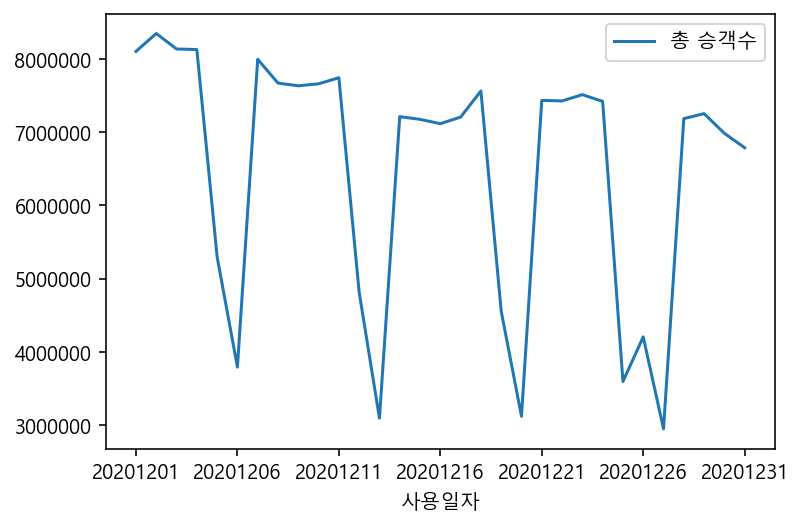

In [22]:
bus_143.plot.line(x='사용일자',y='총 승객수')

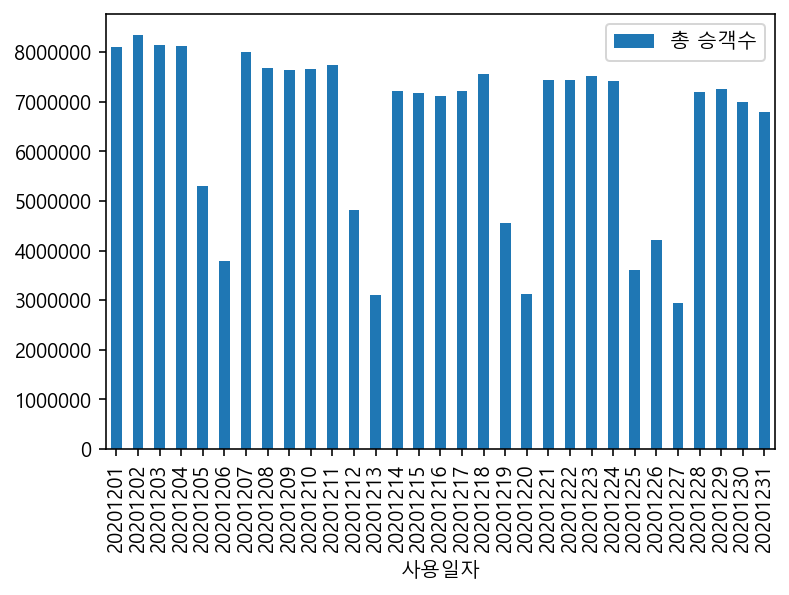

In [23]:
bus_143.plot.bar(x='사용일자',y='총 승객수')

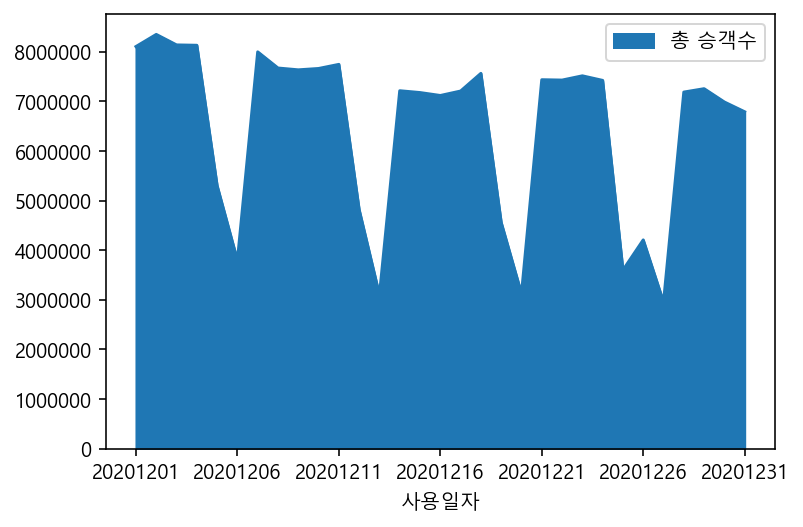

In [25]:
bus_143.plot.area(x='사용일자',y='총 승객수')

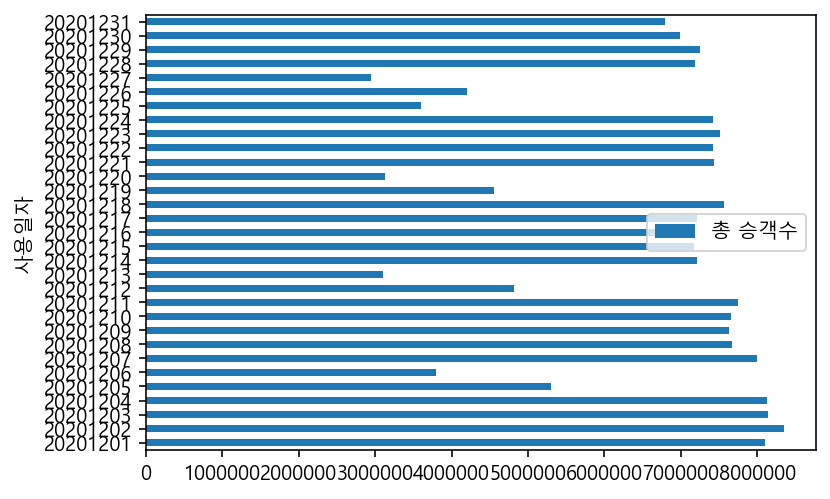

In [27]:
bus_143.plot.barh(x='사용일자',y='총 승객수')